## The `matplotlib` Package

In [1]:
import utils
import importlib
import matplotlib.pyplot as plt
importlib.reload(utils)

utils.dummy_function()
utils.dummy_function_2()

poop
YOOOOOOOOOOOOOOOOO


## Warmup Task 2/8/22

In [2]:
# Build the table

header = ["CarName", "ModelYear", "MSRP"]
msrp_table = [["ford pinto", 75, 2769],
              ["toyota corolla", 75, 2711],
              ["ford pinto", 76, 3025],
              ["toyota corolla", 77, 2789],
              ["ford pinto", 77, 2500],
              ["toyota corolla", 76, 3200],
              ["ford pinto", 75, 3100],
              ["toyota corolla", 77, 2700]]

> Create a bar nad pie chart for the model year counts we computed with `get_frequencies()`

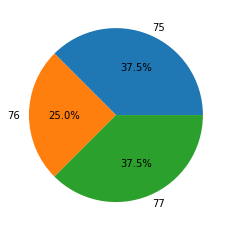

In [3]:
values, counts = utils.get_frequencies(msrp_table, header, "ModelYear")

def pie_chart_example(x, y):
    plt.figure()
    plt.pie(y, labels=x, autopct="%1.1f%%")
    plt.show()
    

pie_chart_example(values, counts)

> Add another histogram with mean=100 and stdev=5 to the same histogram figure. Is the new histogram going to be narrower or wider than the original (blue)?

The new histogram should be narrower because a smaller standard deviation means less spread.

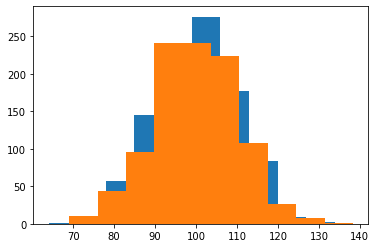

In [4]:
def histogram_example(data_1, data_2):
    # data is a 1D list of data values
    plt.figure()
    plt.hist(data_1, bins=10) # default is 10
    plt.hist(data_2, bins=10) # default is still 10
    plt.show()

    
# let's generate some random "normal" data
import numpy as np 
mean = 100 # mu
stdev = 10 # sigma 
num_samples = 1000 
normal_data = np.random.normal(mean, stdev, num_samples)

# here is the new sample
new_mean = 100 # mu
new_stdev = 5 # sigma
new_normal_data = np.random.normal(new_mean, stdev, num_samples)
histogram_example(normal_data, new_normal_data)

> Add a parameter to `box_plot_example()` called `labels`, where `labels` is a 1D list of x-axis labels. Replace the 1 and 2 on the x-axis

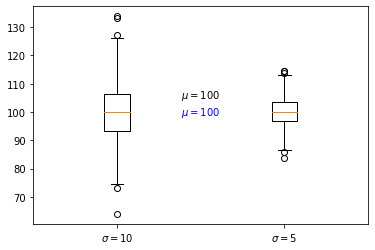

In [5]:
def box_plot_example(distributions, labels):
    # distributions: list of 1D lists of values
    plt.figure()
    plt.boxplot(distributions)

    plt.xticks(list(range(1, len(distributions) + 1)), labels)
    # boxes correspond to the 1st and 3rd quartiles
    # line in the middle of the box corresponds to the 2nd quartile (AKA median)
    # whiskers corresponds to +/- 1.5 * IQR
    # IQR: interquartile range (3rd quartile - 1st quartile)
    # circles outside the whiskers correspond to outliers
    
    # annotations
    # we want to add "mu=100" to the center of our figure
    # xycoords="data": default, specify the location of the label in the same
    # xycoords = "axes fraction": specify the location of the label in absolute
    # axes coordinates... 0,0 is the lower left corner, 1,1 is the upper right corner
    # coordinates as the plotted data
    plt.annotate("$\mu=100$", xy=(1.5, 105), xycoords="data", horizontalalignment="center")
    plt.annotate("$\mu=100$", xy=(0.5, 0.5), xycoords="axes fraction", 
                 horizontalalignment="center", color="blue")

    plt.show()
    
normal_data2 = np.random.normal(mean, stdev / 2, num_samples)
box_plot_example([normal_data, normal_data2], ['$\sigma=10$', '$\sigma=5$'])



## Group By Task

Our goal is to write a general groupby function that returns parallel lists

* group names: e.g. 75, 76, 77
* group subtables: e.g. all the 75 rows, all the 76 rows, all the 77 rows

We will group by to produce a boxplot of MSRPs grouped by model year
* x-axis: categorical attribute ModelYear
* y-axis: continuous attribute MSRP (e.g. one box/whisker for each ModelYear)

You can see the groupby implementation in `utils.py`.

In [6]:
importlib.reload(utils)
modelyear_names, modelyear_subtables = utils.groupby(msrp_table, header, 'ModelYear')
print('HEADER:', modelyear_names)
print()
print('DATA:')
print(modelyear_subtables)

HEADER: [75, 76, 77]

DATA:
[[['ford pinto', 75, 2769], ['toyota corolla', 75, 2711], ['ford pinto', 75, 3100]], [['ford pinto', 76, 3025], ['toyota corolla', 76, 3200]], [['toyota corolla', 77, 2789], ['ford pinto', 77, 2500], ['toyota corolla', 77, 2700]]]


TASK: We need to extract the MSRP distributions (AKA columns) for each subtable and pass them to our `box_plot_example()`

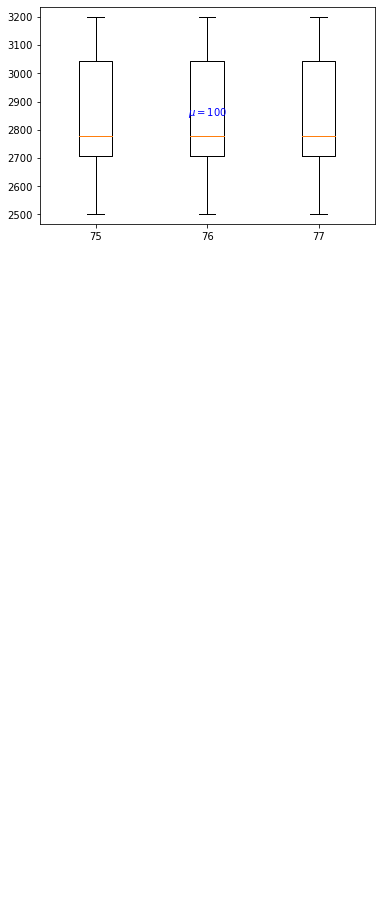

In [7]:
msrp_dists = [utils.get_column(msrp_table, header, "MSRP") for subtable in modelyear_subtables]
box_plot_example(msrp_dists, modelyear_names)

## Discretization

Discretization is the process of converting a numeric (aka continuous) attribute to be discrete or categorical. There are a few ways to do this:

* "equal-width" binning
* "equal-frequency" binning - uneven widths for the bins but they would all have equal heights
* there are multiple ways to define the "cutoffs" for the bins
    * we will use $N+1$ cutoffs (where $N$ is the number of bins)
        * this is because `plt.hist()` and `np.histogram()` use $N+1$ cutoffs
    * The min and max cutoffs are the first and last cutoffs respectively
    * All bins are half open (eg `[ , )`)except the last one which is closed

In [8]:
np.random.seed(0)
values = np.random.choice(100, 20) # numpy array of 20 sampled values
# will convert this into a sorted list as well
values = sorted(list(values))
print(values)
# I missed out on this code and I need to come back and add this later

[9, 12, 21, 36, 39, 44, 46, 47, 58, 64, 65, 67, 67, 70, 83, 87, 87, 88, 88, 88]


## Discretization Lab

Our goal is to essentially write our own implementation of `plt.hist()`


1. Given a list of values and the number of equal-width bins to create ($N$), write a function to return a list of the $N + 1$ cutoff points.
1. Given a list of values and a list of $N + 1$ cutoff points, write a function to return the corresponding frequencies of the N bins.
1. Given a list of the $N$ bins and the $N$ frequencies of the bins, write a function to produce a histogram that matches that produced with the same data by `plt.hist()`


Here is the implementation for Step #1:

In [9]:
importlib.reload(utils)
cutoffs = utils.compute_equal_width_cutoffs(values, 5)
print(cutoffs)

[9.0, 24.8, 40.6, 56.4, 72.2, 88]


Here is the implementation for Step #2:

In [10]:
importlib.reload(utils)
freqs = utils.compute_bin_frequencies(values, cutoffs)
print(freqs)

[0, 2, 6, 18, 15]


Here is the implementation for Step #3:

<BarContainer object of 5 artists>

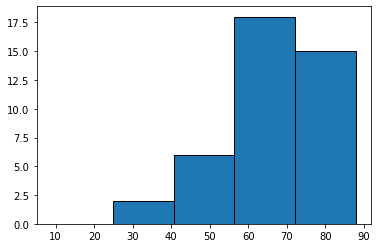

In [11]:
plt.bar(cutoffs[:-1], freqs, width=(cutoffs[1] - cutoffs[0]), edgecolor="black", align="edge")

## Linear Regression

* Suppose we have $x$ and $y$ data, where $x$ is an independent variable and $y$ is a dependent variable
* We want to fit a lin between the $x$ and $y$ data
* We can do this with "simple linear regression" (univariate; 1 independent variable)
* Using the least-squares approach
    * The line has to pass through $(\overline x, \overline y)$
    * Recall: $y = mx + b$
    * The formula is in the regression notes on GitHub so that you can finish PA3 over the weekend

## Warm-up 2/15/22

TESTS PASSED


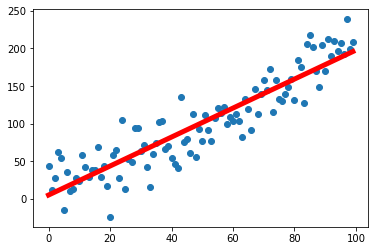

In [20]:
importlib.reload(utils)
from scipy import stats

np.random.seed(0)
x = list(range(0, 100))
y = [value * 2 + np.random.normal(0, 25) for value in x]
plt.scatter(x,y)
m, b = utils.compute_linear_regression(x,y)
sp_m, sp_b, sp_r, sp_pval, sp_std_err = stats.linregress(x, y)
assert np.isclose(m, sp_m) # recall the order is ACTUAL then EXPECTED
assert np.isclose(b, sp_b)

print('TESTS PASSED')
plt.plot([min(x), max(x)], [m * min(x) + b, m * max(x) + b], c='r', lw=5)

## Quantifying the Strength of a Linear Relationship
* See U3/Linear Regression in Gina's notes on GitHub if you want the formulas (will include these later)
* There are several metrics
    * Covariance
    * Correlation
    * Standard error
    * Mean absolute error (MAE)
    * Root mean squared error (RMSE)
    * Others
* Our focus will be on correlation
    * $r$ in $[-1, 1]$
        * 1 means perfect linear relationship as $x$ increases, so does $y$
        * -1 means perfect linear relationship as $x$ increases, $y$ decreases
        * 0 means no linear relationship
        * CORRELATION DOES NOT IMPLY CAUSATION